In [ ]:
# Import necessary libraries
from google.colab import drive
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
from google.colab import files

In [ ]:
# Mount Google Drive to access dataset
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/indianfood'  # Replace with your actual path

In [ ]:
# Define the paths for training and validation directories
train_dir = os.path.join(dataset_path, 'train')

# Image Data Generators
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

# Train and Validation Generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 3010 images belonging to 75 classes.
Found 751 images belonging to 75 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load MobileNetV2 Pretrained Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze pre-trained layers

# Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model
model.fit(
    train_generator,
    epochs=10,  # Increase epochs for better accuracy
    validation_data=val_generator,
    callbacks=[early_stopping]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 897s 9s/step - accuracy: 0.0198 - loss: 4.4501 - val_accuracy: 0.0413 - val_loss: 4.2194
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.0537 - loss: 4.0856 - val_accuracy: 0.0772 - val_loss: 4.0076
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.1310 - loss: 3.8175 - val_accuracy: 0.1465 - val_loss: 3.7364
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.2241 - loss: 3.4567 - val_accuracy: 0.2210 - val_loss: 3.4267
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.2926 - loss: 3.1169 - val_accuracy: 0.2743 - val_loss: 3.1362
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.3766 - loss: 2.7760 - val_accuracy: 0.3182 - val_loss: 2.9031
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.4488 - loss: 2.4520 - val_accuracy: 0.3582 - val_loss: 2.7073
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.5121 - loss: 2.2273 - val_accuracy: 0.3848 - v

In [ ]:
# Save Model
model.save('/content/drive/MyDrive/indianfood_model.h5')

Saving 10.jpg to 10 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


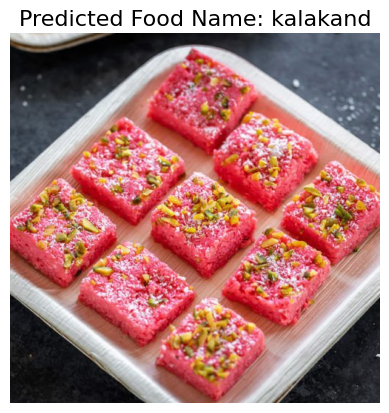

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


# Load Trained Model
model = load_model('/content/drive/MyDrive/indianfood_model.h5')

# Predict Image Function
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]
    return predicted_class

# Upload an Image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Predict
predicted_class = predict_image(image_name)

# Display the Image with Prediction
img = load_img(image_name)
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Food Name: {predicted_class}", fontsize=16)
plt.show()
